In [20]:
!nvidia-smi

Sat Jul 19 16:23:57 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA TITAN RTX               On  | 00000000:3B:00.0 Off |                  N/A |
| 41%   31C    P8              13W / 280W |      1MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
# !lscpu

In [2]:
print("analyssi of sae")

analyssi of sae


# Init

In [3]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import ast
import csv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
DATASET_PATHS = [f"datasets/{name}_processed.csv" for name in DATASET_NAMES]
# Load and concatenate all datasets
df = pd.concat([pd.read_csv(path, encoding="utf-8-sig") for path in DATASET_PATHS], ignore_index=True)

In [11]:
# df1 = df[(df["type"] == "empathetic_dialogue") & (df["category"] == "afraid")]
# df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 155
Columns: 291 entries, type to gemma-scope-2b-pt-mlp-canonical-layer0-top_mean_vals
dtypes: float64(14), object(277)
memory usage: 355.9+ KB


In [9]:
# ! df.dropna(inplace=True)    # for analysis and vis keep all  
df.head()

,type,prompt,category,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_3/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_3/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_3/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_4/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_4/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_4/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_5/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_5/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_5/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_6/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_6/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_6/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_7/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_7/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_7/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_8/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_8/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_8/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_9/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_9/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_9/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_10/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_10/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_10/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_11/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_11/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_11/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_12/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_12/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_12/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_13/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_13/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_13/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_14/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_14/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_14/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_15/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_15/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_15/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_16/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_16/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_16/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_17/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_17/width_16k/canonic

In [5]:
counts = df['type'].value_counts()
print(counts)

type
programming            5000
math                   4998
empathetic_dialogue    4992
mmlu                   4984
Name: count, dtype: int64


In [6]:
df.describe()

,gemma-scope-2b-pt-res-canonical-layer19-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer19-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer20-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer20-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer21-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer21-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer22-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer22-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer23-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer23-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer24-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer24-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer25-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer25-top_mean_vals
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.count()

type                                                                              19974
prompt                                                                            19974
category                                                                          19974
gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_ids          14973
gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_vals         14973
gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids     19968
gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_ids          14973
gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_vals         14973
gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-token_feature_ids     19968
gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_ids          14973
gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_vals         14973
gemma-scope-2b-pt-res-canonical-

# Get databases

In [8]:
# create freq of vectors [0, 0, 0, .., 0]
VECTOR_SIZE_SAE = 16384
def to_vector(specialized_df, col_name, binary_vector=False):
    """
    input:
        specialized_df: pandas df 
        col_name: col name with its layer and type 
    output:
        vector of size 16500
            max neuron 16383
    """
    shared_neurons = [0] * VECTOR_SIZE_SAE
    for row_list_str in specialized_df[col_name]:      # TODO: optimize with counter
        # skip missing entries
        if pd.isna(row_list_str):
            continue
        neuron_list = ast.literal_eval(row_list_str)
        for neuron in neuron_list:
            if binary_vector:
                shared_neurons[neuron] = 1
            else:
                shared_neurons[neuron] += 1
            
    return shared_neurons
    
# to_vector(df, "gemma-scope-2b-pt-res-canonical-layer0-token_feature_ids")
# first_list = ast.literal_eval(df["gemma-scope-2b-pt-res-canonical-layer0-token_feature_ids"].iloc[0] )  # now a Python list of ints

In [9]:
import numpy as np

def percentage_activation(v1, v2):
    """
    Calculates the percentage of neurons that are active in both vectors.

    An active neuron is indicated by a non-zero value at its index. The function
    counts positions where both v1[i] and v2[i] are non-zero.

    Args:
        v1 (list or np.ndarray): The first vector representing neuron activations.
        v2 (list or np.ndarray): The second vector, of the same size as v1.

    Returns:
        float: The percentage of co-active neurons, from 0.0 to 100.0.
    """
    # For robustness, ensure vectors are the same size
    if len(v1) != len(v2):
        raise ValueError("Input vectors must be of the same size.")

    common_count = sum(1 for a, b in zip(v1, v2) if a > 0 and b > 0)
    
    # Compute percentage
    common_pct = common_count / VECTOR_SIZE_SAE * 100

    return common_count, common_pct

# Get percentages 

In [13]:
DATASET_TYPES = {
    "empathetic_dialogue": df.loc[df["type"] == "empathetic_dialogue", "category"].unique(),
    "math":                df.loc[df["type"] == "math",                "category"].unique(),
    "mmlu":                df.loc[df["type"] == "mmlu",                "category"].unique(),
    "programming":         df.loc[df["type"] == "programming",         "category"].unique(),
}
print(DATASET_TYPES)


# DATASET_TYPES = [
#                 "empathetic_dialogue", 
#                 "math", 
#                 "mmlu", 
#                 "programming"
#                 ]

{'empathetic_dialogue': array(['afraid', 'angry', 'annoyed', 'anticipating', 'anxious',
       'apprehensive', 'ashamed', 'caring', 'confident', 'content',
       'devastated', 'disappointed', 'disgusted', 'embarrassed',
       'excited', 'faithful', 'furious', 'grateful', 'guilty', 'hopeful',
       'impressed', 'jealous', 'joyful', 'lonely', 'nostalgic',
       'prepared', 'proud', 'sad', 'sentimental', 'surprised',
       'terrified', 'trusting'], dtype=object), 'math': array(['counting_and_probability', 'precalculus', 'intermediate_algebra',
       'algebra', 'geometry', 'number_theory', 'prealgebra'], dtype=object), 'mmlu': array(['abstract_algebra', 'anatomy', 'astronomy', 'business_ethics',
       'clinical_knowledge', 'college_biology', 'college_chemistry',
       'college_computer_science', 'college_mathematics',
       'college_medicine', 'computer_security', 'conceptual_physics',
       'econometrics', 'electrical_engineering', 'elementary_mathematics',
       'formal_logic'

In [11]:
# # between class

# TYPE = [
#         "res", 
#         "mlp", 
#         "att",
#        ]
# LAYER = [i for i in range(26)]


# results = []

# for typ in TYPE:
#     for layer in LAYER:
#         # between class
#         for class1 in DATASET_TYPES:
#             for class2 in DATASET_TYPES:
#                 if class1 > class2:
#                     continue
#                 col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
                
#                 # 1. get df 
#                 class1_filtered = df[df['type'] == class1]
#                 class2_filtered = df[df['type'] == class2]
                
#                 # 2. to vector
#                 vec_class1 = to_vector(class1_filtered, col, False)
#                 vec_class2 = to_vector(class2_filtered, col, False)

#                 common_count, activation_percentage = percentage_activation(vec_class1, vec_class2)

#                 print(class1, class2)
                
#                 # pearson_corr = calculate_pearson(vec_class1, vec_class2)[0]
#                 # spearman_corr = calculate_spearman(vec_class1, vec_class2)[0]
#                 # cosine_sim = calculate_cosine_similarity(vec_class1, vec_class2)
#                 # jaccard_sim = calculate_jaccard_similarity(vec_class1, vec_class2)

#                 # # Store results in a dictionary
#                 result_row = {
#                     'Type': typ,
#                     'Layer': layer,
#                     'Class1': class1,
#                     'Class2': class2,
#                     'ActivationPercentage': activation_percentage  # Add the new value here
#                 }
#                 results.append(result_row)

In [ ]:
# WITHIN CLASS 

import itertools
TYPE = ["res", "mlp", "att"]
LAYERS = range(26)

results = []

for typ in TYPE:
    for layer in LAYERS:
        col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"

        # 2. For each dataset type, loop over all unique (category1, category2) pairs
        for dataset_type, categories in DATASET_TYPES.items():
            for class1, class2 in itertools.combinations(categories, 2):
                # filter down to just those two classes within this dataset type
                df1 = df[(df["type"] == dataset_type) & (df["category"] == class1)]
                df2 = df[(df["type"] == dataset_type) & (df["category"] == class2)]

                vec1 = to_vector(df1, col, False)
                vec2 = to_vector(df2, col, False)

                common_count, activation_pct = percentage_activation(vec1, vec2)

                results.append({
                    "Type": typ,
                    "Layer": layer,
                    "DatasetType": dataset_type,
                    "Class1": class1,
                    "Class2": class2,
                    "ActivationPercentage": activation_pct
                })

# at the end you can wrap results in a DataFrame if you like:
# import pandas as pd
# results_df = pd.DataFrame(results)
# print(results_df)


In [ ]:
vis_df = pd.DataFrame(results)
vis_df.to_csv("./find_similarity/activation_percentage_within-class.csv", index=False)
vis_df.head()

In [41]:
# import pandas as pd

# # Load the activation percentage data
# vis_df = pd.read_csv('./find_similarity/activation_percentage_between-class.csv')
# import pandas as pd

# # This combines the 'Class1' and 'Class2' columns with '_vs_' in between.
# vis_df['class_pair'] = vis_df['Class1'] + '_vs_' + vis_df['Class2']

# # A list of the unique layer types you want to create tables for
# types = ['res', 'att', 'mlp']

# # A dictionary to hold the created pivot tables
# pivoted_tables = {}

# # Loop through each layer type
# for t in types:
#     # Filter the DataFrame to only include rows with the current layer type
#     filtered_df = vis_df[vis_df['Type'] == t]

#     # Create a pivot table for the filtered data.
#     # - 'index' specifies the rows (our 'class_pair').
#     # - 'columns' specifies the columns (the 'Layer' number).
#     # - 'values' specifies the data to fill the table (the 'ActivationPercentage').
#     pivot_table = filtered_df.pivot_table(
#         index='class_pair',
#         columns='Layer',
#         values='ActivationPercentage'
#     )

#     # Store the generated pivot table in our dictionary
#     pivoted_tables[t] = pivot_table

#     # Save the pivot table to a new CSV file, named after its type.
#     # For example, 'res_activation_percentage.csv'
#     pivot_table.to_csv(f'{t}_activation_percentage.csv')

#     # Optional: Print the table to the console to view it immediately
#     print(f"--- {t.upper()} Table ---")
#     print(pivot_table)
#     print("\n")

In [31]:
# import pandas as pd
# from IPython.display import display

# # Load the activation percentage data
# df = pd.read_csv('./find_similarity/activation_percentage_between-class.csv')

# # Define the types for which we want tables
# types = ['res', 'att', 'mlp']

# # Generate and display a pivot table for each type using pandas
# for t in types:
#     subset = df[df['Type'] == t]
#     pivot = subset.pivot(index=['Class1', 'Class2'], columns='Layer', values='ActivationPercentage')
#     print(f"{t.upper()} Activation Percentages by Layer\n")
#     display(pivot)


RES Activation Percentages by Layer



Layer                                           0          1          2   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  49.279785  40.240479  40.899658   
                    math                 37.036133  28.497314  29.809570   
                    mmlu                 47.351074  37.951660  38.714600   
                    programming          45.684814  36.175537  37.249756   
math                math                 52.856445  43.328857  45.446777   
                    mmlu                 49.523926  39.837646  41.699219   
                    programming          48.815918  39.093018  40.985107   
mmlu                mmlu                 73.516846  62.945557  63.482666   
                    programming          63.897705  52.441406  53.692627   
programming         programming          69.244385  58.435059  60.717773   

Layer                                           3          4          5   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  43.328857  37.786865  38.757324   
                    math                 31.555176  26.385498  27.770996   
                    mmlu                 41.290283  35.510254  36.962891   
                    programming          39.788818  34.240723  35.626221   
math                math                 49.633789  42.376709  45.239258   
                    mmlu                 45.227051  38.079834  40.661621   
                    programming          45.129395  37.841797  41.027832   
mmlu                mmlu                 68.695068  59.075928  62.109375   
                    programming          58.825684  49.694824  53.344727   
programming         programming          66.583252  57.678223  61.791992   

Layer                                           6          7          8   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  36.291504  32.519531  33.117676   
                    math                 25.665283  21.246338  21.258545   
                    mmlu                 34.527588  30.169678  30.242920   
                    programming          33.282471  28.271484  28.344727   
math                math                 43.798828  39.764404  39.422607   
                    mmlu                 39.239502  34.777832  34.387207   
                    programming          39.648438  34.979248  34.777832   
mmlu                mmlu                 60.577393  57.617188  58.349609   
                    programming          51.824951  46.380615  46.252441   
programming         programming          60.565186  55.010986  55.322266   

Layer                                           9          10         11  \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  32.086182  30.242920  28.222656   
                    math                 19.793701  18.731689  16.906738   
                    mmlu                 29.144287  27.416992  25.207520   
                    programming          27.233887  25.671387  23.425293   
math                math                 38.299561  38.189697  36.340332   
                    mmlu                 33.337402  32.556152  30.541992   
                    programming          33.782959  33.355713  31.744385   
mmlu                mmlu                 57.849121  56.109619  54.547119   
                    programming          45.343018  44.195557  41.839600   
programming         programming          54.327393  54.022217  52.239990   

Layer                                           12         13         14  \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  25.732422  25.164795  26.696777   
                    math                 15.637207  15.277100  16.613770   
                    mmlu                 22.

ATT Activation Percentages by Layer



Layer                                           0          1          2   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  22.875977  29.931641  36.425781   
                    math                 15.258789  21.435547  27.923584   
                    mmlu                 20.513916  27.661133  34.429932   
                    programming          20.056152  27.172852  34.082031   
math                math                 29.150391  38.940430  44.036865   
                    mmlu                 23.638916  33.520508  39.233398   
                    programming          24.536133  34.033203  39.685059   
mmlu                mmlu                 41.064453  51.995850  56.610107   
                    programming          32.879639  43.438721  49.255371   
programming         programming          41.717529  52.838135  57.324219   

Layer                                           3          4          5   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  28.906250  19.036865  17.108154   
                    math                 21.673584  13.262939   9.918213   
                    mmlu                 26.910400  17.803955  14.245605   
                    programming          26.593018  17.517090  14.794922   
math                math                 37.939453  27.667236  21.545410   
                    mmlu                 32.336426  22.735596  17.218018   
                    programming          32.446289  23.455811  18.334961   
mmlu                mmlu                 46.844482  35.760498  30.389404   
                    programming          39.343262  29.675293  24.096680   
programming         programming          47.949219  37.915039  34.326172   

Layer                                           6          7          8   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  16.198730  16.931152  11.187744   
                    math                 11.273193   9.466553   4.602051   
                    mmlu                 14.770508  14.178467   8.093262   
                    programming          14.959717  13.214111   6.524658   
math                math                 30.169678  21.118164  14.306641   
                    mmlu                 22.924805  17.114258  10.058594   
                    programming          25.476074  17.535400  10.125732   
mmlu                mmlu                 35.717773  33.001709  23.773193   
                    programming          29.718018  23.297119  12.701416   
programming         programming          41.125488  31.665039  19.189453   

Layer                                           9          10         11  \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue   5.627441   7.550049   6.506348   
                    math                  1.861572   2.789307   2.246094   
                    mmlu                  3.015137   5.261230   3.607178   
                    programming           3.112793   5.041504   3.186035   
math                math                  8.789062  12.750244  11.090088   
                    mmlu                  5.413818   7.946777   6.738281   
                    programming           5.865479   9.405518   7.427979   
mmlu                mmlu                 14.532471  18.585205  17.529297   
                    programming           6.915283  11.437988   8.093262   
programming         programming          13.214111  20.001221  15.301514   

Layer                                           12         13         14  \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue   3.594971   9.576416   6.109619   
                    math                  1.184082   3.692627   1.873779   
                    mmlu                  1.

MLP Activation Percentages by Layer



Layer                                           0          1          2   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  31.555176  39.239502  46.148682   
                    math                 20.935059  25.469971  33.166504   
                    mmlu                 28.729248  35.083008  43.078613   
                    programming          28.472900  33.251953  42.224121   
math                math                 34.576416  41.217041  51.080322   
                    mmlu                 30.541992  36.676025  46.514893   
                    programming          30.932617  35.998535  46.697998   
mmlu                mmlu                 50.646973  67.669678  72.100830   
                    programming          42.254639  51.562500  61.914062   
programming         programming          49.810791  61.749268  71.209717   

Layer                                           3          4          5   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  48.944092  38.568115  47.979736   
                    math                 37.725830  25.000000  35.443115   
                    mmlu                 47.167969  35.931396  45.941162   
                    programming          46.557617  35.382080  45.379639   
math                math                 56.347656  42.614746  55.120850   
                    mmlu                 52.349854  37.829590  50.219727   
                    programming          52.600098  38.665771  51.281738   
mmlu                mmlu                 72.753906  61.791992  70.825195   
                    programming          65.899658  53.417969  64.251709   
programming         programming          72.973633  62.487793  72.424316   

Layer                                           6          7          8   \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  44.409180  37.512207  43.890381   
                    math                 31.353760  20.288086  27.081299   
                    mmlu                 42.095947  33.514404  40.045166   
                    programming          41.314697  31.988525  38.214111   
math                math                 52.117920  39.868164  46.600342   
                    mmlu                 46.624756  34.338379  41.577148   
                    programming          48.071289  35.052490  42.352295   
mmlu                mmlu                 68.041992  63.220215  69.067383   
                    programming          60.601807  50.573730  57.037354   
programming         programming          69.494629  61.230469  66.271973   

Layer                                           9          10         11  \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  42.034912  38.800049  34.265137   
                    math                 25.592041  25.610352  20.111084   
                    mmlu                 38.305664  36.010742  31.024170   
                    programming          36.279297  34.783936  29.644775   
math                math                 45.788574  46.960449  40.313721   
                    mmlu                 40.399170  40.850830  34.143066   
                    programming          41.143799  42.742920  36.376953   
mmlu                mmlu                 66.638184  61.651611  56.604004   
                    programming          54.650879  52.996826  47.229004   
programming         programming          64.111328  62.121582  57.293701   

Layer                                           12         13         14  \
Class1              Class2                                                 
empathetic_dialogue empathetic_dialogue  35.351562  34.356689  37.420654   
                    math                 24.151611  21.173096  25.585938   
                    mmlu                 33.

In [40]:
# import pandas as pd
# from IPython.display import display

# # Load the activation percentage data
# df = pd.read_csv('./find_similarity/activation_percentage_between-class.csv')

# # Define the types for which we want tables
# types = ['res', 'att', 'mlp']

# # Generate and display a pivot table for each type with values rounded to 2 decimal places
# for t in types:
#     subset = df[df['Type'] == t]
#     pivot = subset.pivot(index=['Class1', 'Class2'], columns='Layer', values='ActivationPercentage')
#     pivot = pivot.round(0).astype(int)           # ← round then convert to int
#     print(f"{t.upper()} Activation Percentages by Layer (2 d.p.)\n")
#     filename = f'./find_similarity/{t}_activation_percentages.csv'
#     pivot.to_csv(filename)
#     display(pivot)


# Analysis between class

In [ ]:
import pandas as pd
from IPython.display import display

# Load the activation percentage data
df = pd.read_csv('./find_similarity/activation_percentage_between-class.csv')

types = ['res','att','mlp']

for t in types:
    subset = df[df['Type']==t]
    pivot = subset.pivot(index=['Class1','Class2'],
                         columns='Layer',
                         values='ActivationPercentage')
    # round & convert to int if you like
    pivot = pivot.round(0).astype(int)
    
    # compute mean across all layer columns
    pivot['Mean'] = pivot.mean(axis=1).round(2)   # 2 d.p.
    # if you want integer means:
    # pivot['Mean'] = pivot.mean(axis=1).round(0).astype(int)
    
    # save and display
    filename = f'./find_similarity/percentages/{t}_activation_percentages_with_mean_between_class.csv'
    pivot.to_csv(filename)
    print(f"{t.upper()} (with row‐means)\n")
    display(pivot)


## Heatmaps

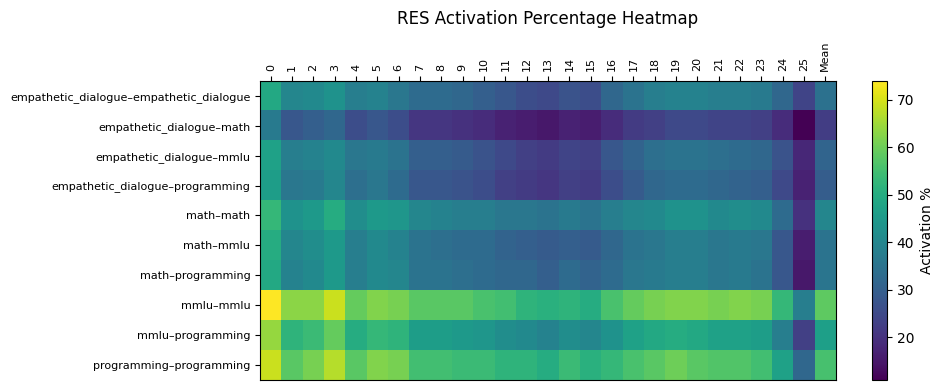

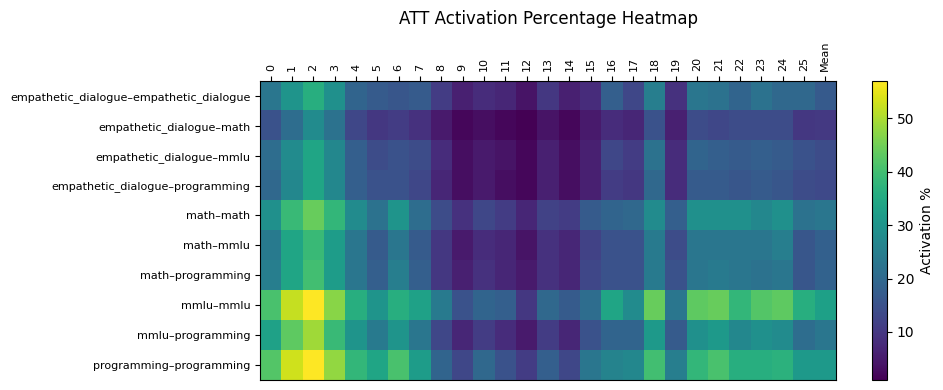

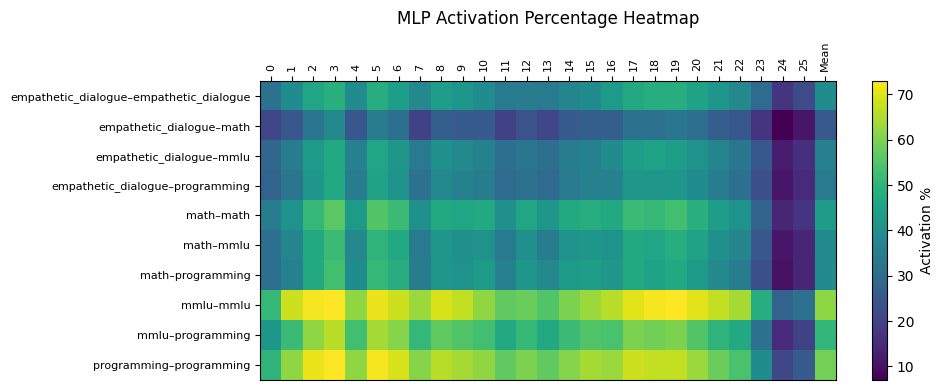

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (adjust the path if needed)
df = pd.read_csv('./find_similarity/activation_percentage_between-class.csv')

types = ['res', 'att', 'mlp']

for t in types:
    # Build the pivot table
    subset = df[df['Type'] == t]
    pivot = subset.pivot(
        index=['Class1', 'Class2'],
        columns='Layer',
        values='ActivationPercentage'
    )
    pivot = pivot.round(0).astype(int)
    pivot['Mean'] = pivot.mean(axis=1).round(2)
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(10, max(4, len(pivot) * 0.3)))
    im = ax.imshow(pivot.values, aspect='auto')
    ax.set_xticks(range(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns, rotation=90, fontsize=8)
    ax.xaxis.tick_top()
    ax.tick_params(axis='x', labeltop=True, labelbottom=False)
    ax.set_yticks(range(len(pivot.index)))
    ax.set_yticklabels([f"{c1}–{c2}" for c1, c2 in pivot.index], fontsize=8)
    ax.set_title(f"{t.upper()} Activation Percentage Heatmap", pad=12)
    fig.colorbar(im, ax=ax, orientation='vertical', label='Activation %')
    plt.tight_layout()

    fname = f"./find_similarity/heatmaps_between_class/{t}_activation_heatmap.png"
    fig.savefig(fname, dpi=300, bbox_inches='tight')

    plt.show()


# Anallysis within class

   Type  Layer  ActivationPercentage
0   att      0              2.511021
1   att      1              3.111932
2   att      2              5.102971
3   att      3              3.533706
4   att      4              2.529173
5   att      5              1.839526
6   att      6              1.860726
7   att      7              1.654502
8   att      8              0.615756
9   att      9              0.418396
10  att     10              0.544197
11  att     11              0.509224
12  att     12              0.398975
13  att     13              0.926847
14  att     14              0.403469
15  att     15              1.099646
16  att     16              1.112587
17  att     17              1.179518
18  att     18              2.173812
19  att     19              1.377932
20  att     20              1.678291
21  att     21              2.020875
22  att     22              2.033349
23  att     23              2.072972
24  att     24              2.974668
25  att     25              1.896810
2

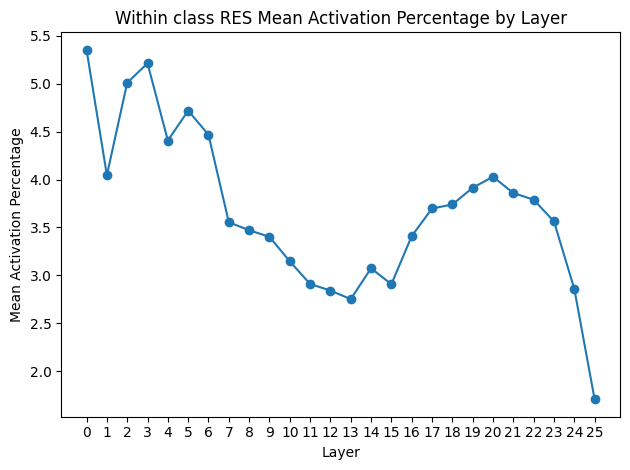

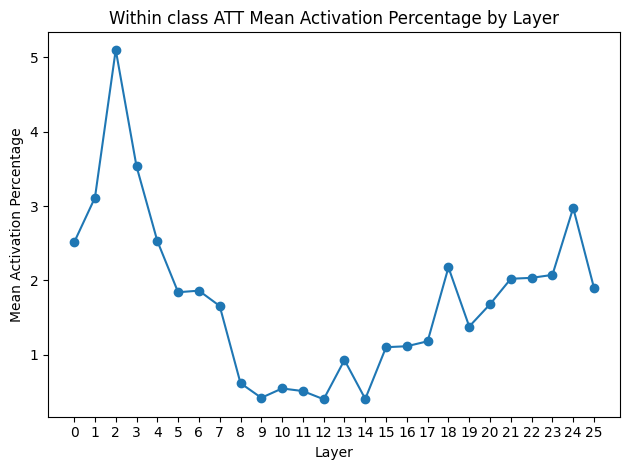

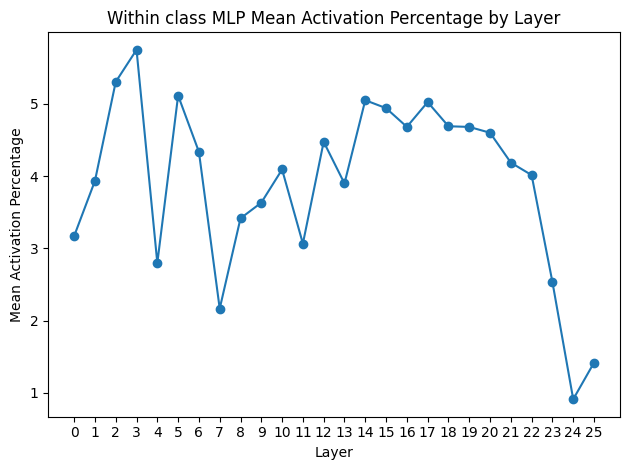

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('./find_similarity/activation_percentage_within-class.csv')

types = ['res', 'att', 'mlp']

# Compute mean activation per layer for each type
means = df.groupby(['Type', 'Layer'])['ActivationPercentage'].mean().reset_index()

print(means)
for t in types:
    subset = means[means['Type'] == t]
    fig, ax = plt.subplots()
    ax.plot(subset['Layer'], subset['ActivationPercentage'], marker='o')
    ax.set_title(f"Within class {t.upper()} Mean Activation Percentage by Layer")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Mean Activation Percentage")
    ax.set_xticks(subset['Layer'])
    plt.tight_layout()
    
    fname = f"./find_similarity/heatmaps_within_class/within_class_{t}_activation_heatmap.png"
    fig.savefig(fname, dpi=300, bbox_inches='tight')
    
    plt.show()
